### Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load datasets
cancer_df = pd.read_csv('cancer.csv')
bankrupt_df = pd.read_csv('bankrupt.csv')

# Show column names and info
print("Cancer dataset columns:\n", cancer_df.columns)
print("Bankruptcy dataset columns:\n", bankrupt_df.columns)


Cancer dataset columns:
 Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')
Bankruptcy dataset columns:
 Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Valu

### Preprocessing (Drop NAs, Keep Numeric, Scale)

In [2]:
# Drop rows with missing values
cancer_df_clean = cancer_df.dropna()
bankrupt_df_clean = bankrupt_df.dropna()

# Select only numerical columns
cancer_X = cancer_df_clean.select_dtypes(include=[np.number])
bankrupt_X = bankrupt_df_clean.select_dtypes(include=[np.number])

# Standardize features
scaler_cancer = StandardScaler()
cancer_X_scaled = scaler_cancer.fit_transform(cancer_X)

scaler_bankrupt = StandardScaler()
bankrupt_X_scaled = scaler_bankrupt.fit_transform(bankrupt_X)


In [3]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# You can change n_clusters if you wish (try 2-5)
n_clusters = 3

# K-Means
kmeans_cancer = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_cancer_labels = kmeans_cancer.fit_predict(cancer_X_scaled)

kmeans_bankrupt = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_bankrupt_labels = kmeans_bankrupt.fit_predict(bankrupt_X_scaled)

# Gaussian Mixture Model (EM)
gmm_cancer = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_cancer_labels = gmm_cancer.fit_predict(cancer_X_scaled)

gmm_bankrupt = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_bankrupt_labels = gmm_bankrupt.fit_predict(bankrupt_X_scaled)

# Silhouette Scores
print("Silhouette (KMeans, Cancer):", silhouette_score(cancer_X_scaled, kmeans_cancer_labels))
print("Silhouette (GMM, Cancer):", silhouette_score(cancer_X_scaled, gmm_cancer_labels))
print("Silhouette (KMeans, Bankrupt):", silhouette_score(bankrupt_X_scaled, kmeans_bankrupt_labels))
print("Silhouette (GMM, Bankrupt):", silhouette_score(bankrupt_X_scaled, gmm_bankrupt_labels))


/Users/maxmatkovski/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxmatkovski/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette (KMeans, Cancer): 0.08681559132410345
Silhouette (GMM, Cancer): 0.07222682244912479
Silhouette (KMeans, Bankrupt): 0.10741175195746241
Silhouette (GMM, Bankrupt): 0.03379523488318877


In [4]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

n_components = 2  

# PCA
pca_cancer = PCA(n_components=n_components)
cancer_pca = pca_cancer.fit_transform(cancer_X_scaled)

pca_bankrupt = PCA(n_components=n_components)
bankrupt_pca = pca_bankrupt.fit_transform(bankrupt_X_scaled)

# ICA
ica_cancer = FastICA(n_components=n_components, random_state=42)
cancer_ica = ica_cancer.fit_transform(cancer_X_scaled)

ica_bankrupt = FastICA(n_components=n_components, random_state=42)
bankrupt_ica = ica_bankrupt.fit_transform(bankrupt_X_scaled)

# Randomized Projections
rp_cancer = GaussianRandomProjection(n_components=n_components, random_state=42)
cancer_rp = rp_cancer.fit_transform(cancer_X_scaled)

rp_bankrupt = GaussianRandomProjection(n_components=n_components, random_state=42)
bankrupt_rp = rp_bankrupt.fit_transform(bankrupt_X_scaled)


In [5]:
# Defining function to run on
def run_clustering(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X)
    gmm = GaussianMixture(n_components=n_clusters, random_state=42).fit_predict(X)
    return kmeans, gmm

# Cancer dataset
km_pca_cancer, gm_pca_cancer = run_clustering(cancer_pca)
km_ica_cancer, gm_ica_cancer = run_clustering(cancer_ica)
km_rp_cancer,  gm_rp_cancer  = run_clustering(cancer_rp)

# Bankruptcy dataset
km_pca_bankrupt, gm_pca_bankrupt = run_clustering(bankrupt_pca)
km_ica_bankrupt, gm_ica_bankrupt = run_clustering(bankrupt_ica)
km_rp_bankrupt,  gm_rp_bankrupt  = run_clustering(bankrupt_rp)


/Users/maxmatkovski/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxmatkovski/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxmatkovski/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxmatkovski/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

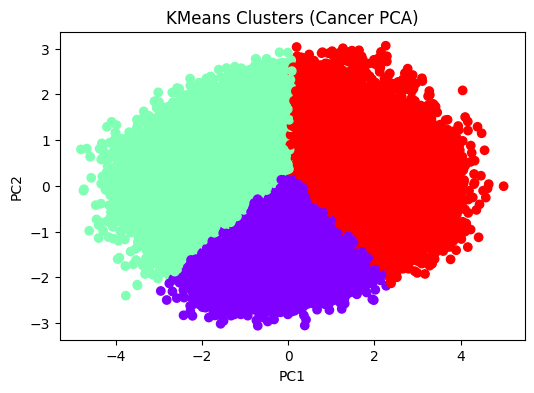

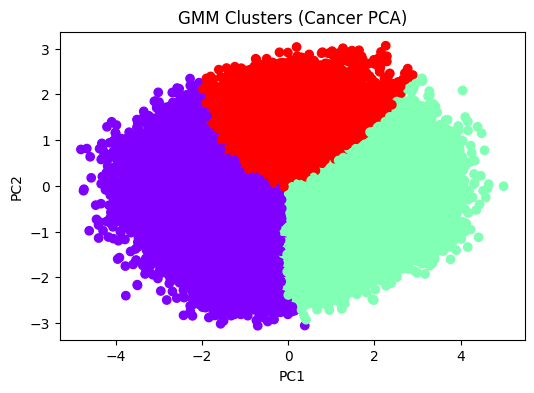

In [6]:
import matplotlib.pyplot as plt

# Visualize clustering for Cancer dataset (PCA)
plt.figure(figsize=(6,4))
plt.scatter(cancer_pca[:, 0], cancer_pca[:, 1], c=km_pca_cancer, cmap='rainbow')
plt.title("KMeans Clusters (Cancer PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Visualize GMM for Cancer dataset (PCA)
plt.figure(figsize=(6,4))
plt.scatter(cancer_pca[:, 0], cancer_pca[:, 1], c=gm_pca_cancer, cmap='rainbow')
plt.title("GMM Clusters (Cancer PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Repeat for ICA and RP, and for bankruptcy dataset as desired


In [ ]:
# Example: Print silhouette scores
methods = {
    'Original': (cancer_X_scaled, kmeans_cancer_labels, gmm_cancer_labels),
    'PCA':      (cancer_pca, km_pca_cancer, gm_pca_cancer),
    'ICA':      (cancer_ica, km_ica_cancer, gm_ica_cancer),
    'RP':       (cancer_rp, km_rp_cancer, gm_rp_cancer)
}

for name, (X, kmeans_labels, gmm_labels) in methods.items():
    print(f"Cancer {name} - KMeans Silhouette: {silhouette_score(X, kmeans_labels):.3f}")
    print(f"Cancer {name} - GMM Silhouette: {silhouette_score(X, gmm_labels):.3f}")


Cancer Original - KMeans Silhouette: 0.087
Cancer Original - GMM Silhouette: 0.072
Cancer PCA - KMeans Silhouette: 0.329
Cancer PCA - GMM Silhouette: 0.330
Cancer ICA - KMeans Silhouette: 0.338


In [ ]:
import pandas as pd
import numpy as np

# Load and clean
cancer_df = pd.read_csv('cancer.csv').dropna()
# Keep only numeric columns
cancer_X = cancer_df.select_dtypes(include=[np.number])


In [ ]:
n_cancer, d_cancer = cancer_X.shape
print(f"n_cancer: {n_cancer}, d_cancer: {d_cancer}")


In [ ]:
cancer_X.shape

In [ ]:
cancer_X

In [ ]:
import numpy as np
import pandas as pd

bankrupt_df = pd.read_csv('bankrupt.csv').dropna()
bankrupt_X = bankrupt_df.select_dtypes(include=[np.number])

# sample and feature counts:
n_bankrupt, d_bankrupt = bankrupt_X.shape
print(f"n_bankrupt: {n_bankrupt}, d_bankrupt: {d_bankrupt}")


In [ ]:
n_bankrupt, d_bankrupt = bankrupt_X.shape
print(f"n_bankrupt: {n_bankrupt}, d_bankrupt: {d_bankrupt}")


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
cancer_df = pd.read_csv('cancer.csv')

# Drop rows with missing values
cancer_df_clean = cancer_df.dropna()

# Select only numerical columns 
cancer_X = cancer_df_clean.select_dtypes(include=['float64', 'int64'])

# Standardize features (important for PCA/KMeans)
scaler = StandardScaler()
cancer_X_scaled = scaler.fit_transform(cancer_X)


In [ ]:
from sklearn.decomposition import PCA

# Fit PCA with 2 components
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
total_explained = explained_var.sum() * 100
print(f"Total variance explained by first two PCs: {total_explained:.1f}%")


In [ ]:
# Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load and clean data
cancer_df = pd.read_csv('cancer.csv')
cancer_df_clean = cancer_df.dropna()
cancer_X = cancer_df_clean.select_dtypes(include=[np.number])

# Use Cancer_Type as label
y = cancer_df_clean['Cancer_Type'].values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
cancer_X_scaled = scaler.fit_transform(cancer_X)

# Dimensionality reduction
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_X_scaled)

ica = FastICA(n_components=2, random_state=42)
cancer_ica = ica.fit_transform(cancer_X_scaled)

rp = GaussianRandomProjection(n_components=2, random_state=42)
cancer_rp = rp.fit_transform(cancer_X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(cancer_X_scaled, y_encoded, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(cancer_pca, y_encoded, test_size=0.3, random_state=42)
X_train_ica, X_test_ica, _, _ = train_test_split(cancer_ica, y_encoded, test_size=0.3, random_state=42)
X_train_rp, X_test_rp, _, _ = train_test_split(cancer_rp, y_encoded, test_size=0.3, random_state=42)

# Neural network
def run_nn(X_train, X_test, y_train, y_test, name=""):
    clf = MLPClassifier(hidden_layer_sizes=(32,), max_iter=300, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} - Accuracy: {acc:.3f}, F1: {f1:.3f}")

run_nn(X_train, X_test, y_train, y_test, "Original")
run_nn(X_train_pca, X_test_pca, y_train, y_test, "PCA")
run_nn(X_train_ica, X_test_ica, y_train, y_test, "ICA")
run_nn(X_train_rp, X_test_rp, y_train, y_test, "RP")
